In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 18.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=dd51a3ac77a602e33da007b9e13a08db11b1b53bbc6e4eaba14990b9657758e7
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=548f55628d24c83ad4cead3ee25b59959defe2b5973ef079badfa4f02b48931e
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
pip install -U yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from datetime import datetime
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#Gaussian misture, let's choose the proper number of clusters:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [ ]:
#used to erase variable from colabnotebook
#%reset_selective -f data
data=pd.read_csv('/content/data.csv',delimiter=';' ,decimal=",")
df_ID=data['pseudonym']


In [ ]:
norm_data_final_corcut26=pd.read_csv('/content/norm_data_final_corcut26.csv',sep = '\,', header = 0, engine = 'python')
norm_data_final_corcut26.drop(['Unnamed: 0'],axis=1,inplace=True )

In [ ]:
#upload normalised dataset
norm_df=pd.read_csv('/content/final_df_wo_corcut.csv',sep = '\,', header = 0, engine = 'python')
norm_df.drop(['Unnamed: 0'],axis=1,inplace=True )

In [ ]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 149 entries, ageGroup to arrival_public transport
dtypes: float64(128), int64(21)
memory usage: 49.0 KB


In [ ]:
#Find the highly correlated features.
#need to confirm weather these highly correlated features drop from data set
correlated_features = set() #use set data structure for avoid duplicates
correlation_matrix = norm_df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'Minimum_of_accelerometer_6mwt_split4_v2', 'hee_t4', 'Deviation_of_accelerometer_6mwt_split4_v3', 'Maximum_of_accelerometer_6mwt_split4_v3', 'Minimum_of_accelerometer_sct_split2_v3', 'Minimum_of_accelerometer_6mwt_split2_v3', 'amount_of_confidence_two_in_sct', 'Deviation_of_smartphone_6mwt', 'Minimum_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split3_v1', 'Maximum_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split2_v1', 'Minimum_of_accelerometer_6mwt_split4_v3', 'Maximum_of_accelerometer_6mwt_split4_v1', 'Maximum_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split4_v1', 'Deviation_of_accelerometer_6mwt_split1_v3', 'Deviation_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split3_v3', 'Minimum_of_accelerometer_6mwt_split3_v3', 'Deviation_of_accelerometer_6mwt_split4_v2', 'panas_neg_t4', 'Minimum_of_accelerometer_6

In [ ]:
print(len(correlated_features))

26


In [ ]:
#drop highly correlated data
norm_df.drop(['Deviation_of_accelerometer_6mwt_split2_v2', 'Minimum_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_6mwt_split4_v2', 'Deviation_of_accelerometer_6mwt_split3_v1', 'panas_neg_t4', 'Deviation_of_accelerometer_6mwt_split2_v1', 'amount_of_confidence_two_in_sct', 'Minimum_of_accelerometer_6mwt_split2_v3', 'Deviation_of_smartphone_sct', 'Minimum_of_accelerometer_6mwt_split4_v3', 'Deviation_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_6mwt_split3_v3', 'Deviation_of_accelerometer_6mwt_split1_v3', 'Maximum_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split4_v1', 'Deviation_of_accelerometer_6mwt_split4_v3', 'Deviation_of_accelerometer_6mwt_split3_v3', 'Minimum_of_accelerometer_6mwt_split3_v1', 'hee_t4', 'Minimum_of_accelerometer_sct_split2_v3', 'Deviation_of_smartphone_6mwt', 'Maximum_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split2_v3', 'Maximum_of_accelerometer_6mwt_split4_v3', 'Deviation_of_accelerometer_6mwt_split4_v2', 'Maximum_of_accelerometer_6mwt_split4_v1'],axis=1,inplace=True)


**Dimensionality reduction : UMAP**

In [ ]:
#import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(norm_df)
df_umap=pd.DataFrame(data = embedding, columns =['umap1','umap2'])
df_umap.head()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,umap1,umap2
0,15.295266,8.625645
1,16.257643,8.868095
2,14.085320,5.253630
3,16.320051,10.638216
4,14.381598,7.256986


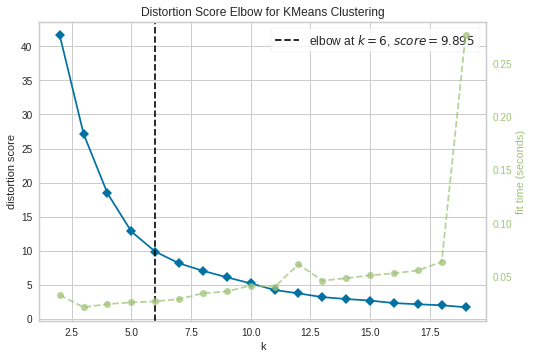

In [ ]:
#set seed
np.random.seed(0)
#find the optimal number of clustering after dimensionality reduction using MDS:
kmeans_model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(kmeans_model, k=(2,20), timings= True)
visualizer.fit(df_umap)        # Fit data to visualizer
visualizer.show() 

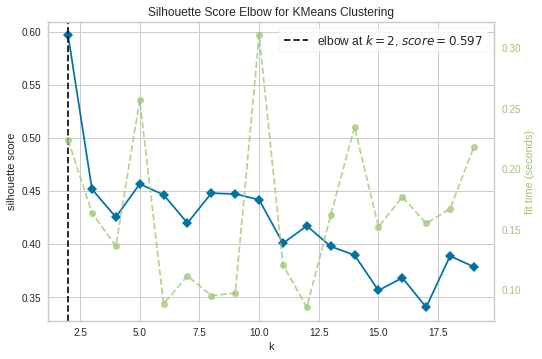

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
#from yellowbrick.cluster import KElbowVisualizer
mod1 = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(mod1, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(df_umap)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

5

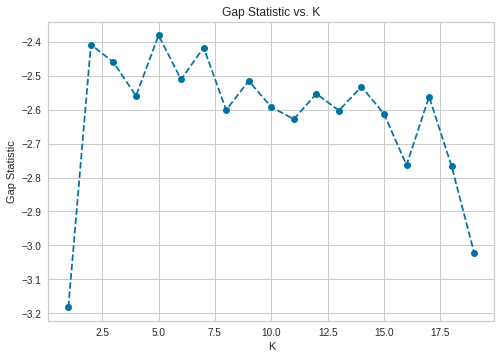

In [ ]:
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(df_umap, nrefs=3, maxClusters=20)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');
score_g

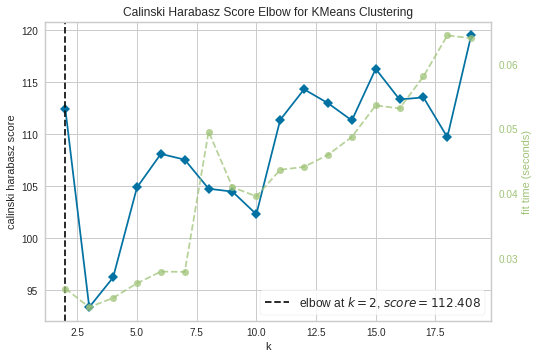

In [ ]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
#from yellowbrick.cluster import KElbowVisualizer
mod2 = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(mod2, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(df_umap)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
#Apply Kmeans clustering algorithm
kmeans = KMeans(2)
#Apply kMeans on data
kmeans.fit(df_umap)
labels = kmeans.labels_ #label/ cluster associating to each data points
#this is centroid of all clusters
kmeans.cluster_centers_.shape
#create a data frame having kmeans centroid and col of df1
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_umap.columns])
#cluster_centers
y_kmeans = kmeans.fit_predict(df_umap)
#y_kmeans

In [ ]:
# concatenate the clusters labels to our original dataframe(orignal_cleaned_data)
orignal_cleaned_data=pd.read_csv('/content/final_df_wo_corcut.csv')
orignal_cleaned_data.drop(['Unnamed: 0'],axis=1,inplace=True)
df_cluster = pd.concat([orignal_cleaned_data, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,ageGroup,gender,bmi,smoker,employed,sports,timeOfDay,testSuit,firstTask,dist_6mwt,...,Minimum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3,swe_6mwtask_after,swe_6mwtask_before,swe_sctask_after,swe_sctask_before,arrival_car/motorcycle,arrival_on foot,arrival_public transport,cluster
0,1,0,26.5,0,1,1,1,0,1,421.00,...,-0.742188,0.159058,9.5,9.5,8.5,9.00,0,0,1,0
1,0,1,25.5,0,1,0,0,1,0,600.00,...,-1.281250,0.232239,10.0,5.5,10.0,8.75,0,1,0,0
2,0,0,22.1,0,1,1,0,1,1,689.00,...,-1.832031,0.242459,10.0,9.5,10.0,9.00,1,0,0,1
3,1,1,22.1,0,1,1,0,1,0,654.55,...,-1.007812,0.209505,8.0,9.0,7.0,10.00,0,0,0,0
4,1,1,26.0,0,0,1,1,0,1,512.00,...,-1.648438,0.215718,10.0,8.5,6.5,4.50,1,0,0,1


In [ ]:
#Check correlation
corr_table = df_cluster.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster']

ageGroup                                         NaN
gender                                           NaN
bmi                                              NaN
smoker                                           NaN
employed                                         NaN
sports                                           NaN
timeOfDay                                        NaN
testSuit                                         NaN
firstTask                                        NaN
dist_6mwt                                        NaN
dist_sct                                         NaN
swe_b_t1                                         NaN
swe_b_t4                                         NaN
swe_m_t1                                         NaN
swe_m_t4                                         NaN
swe_f_t1                                         NaN
swe_f_t4                                         NaN
swe_a_t1                                         NaN
swe_a_t4                                      

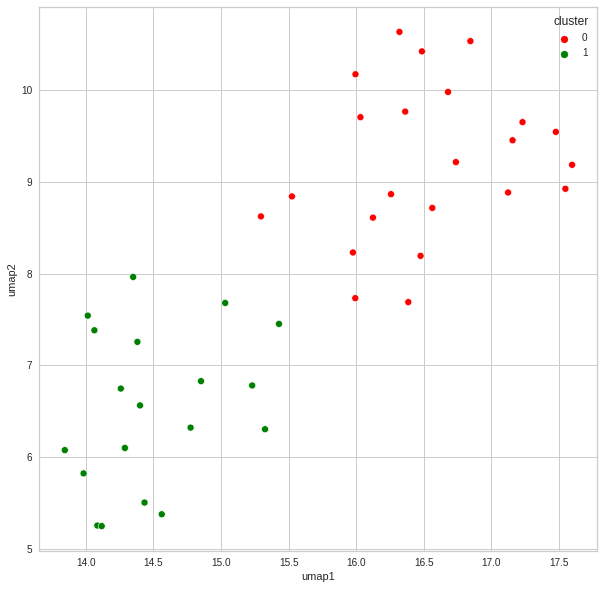

In [ ]:
# Concatenate the clusters labels to the dataframe(pca_df)
df_umap_kmeans=pd.concat([df_umap,pd.DataFrame({'cluster':labels})], axis = 1)
#visualize the clusters using principal components
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="umap1", y="umap2", hue = "cluster", data = df_umap_kmeans, palette =['red','green'])
plt.show()

**Apply HAC Algorithm**

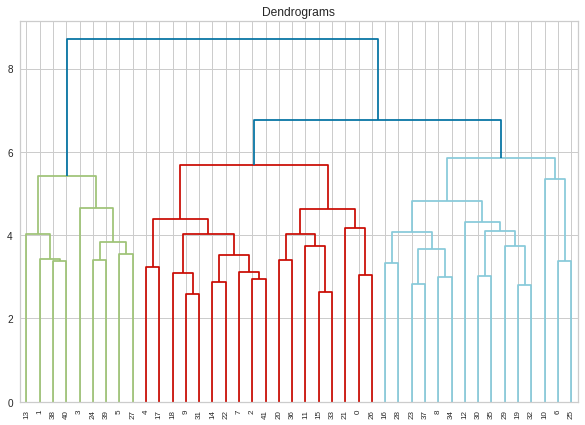

In [ ]:
#implement heirarchical clustering. Used normalized data after dropping highly correlated variables
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(norm_data_final_corcut26, method='ward'))

In [ ]:
#based on colour , we can decide optimal number of cluster. Or draw a horizontal line over blue line find count of intercet points
optimal_num_clusters=len(set(dend['color_list']))-1
print(optimal_num_clusters)

3


In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hc=cluster.fit_predict(df_umap)
#0 represents the points that belong to the first cluster and 1 represents points in the second cluster.

In [ ]:
# Concatenate the clusters labels to the dataframe(pca_df)
df_umap_cpy=df_umap.copy()
df_umap_hac = pd.concat([df_umap_cpy,pd.DataFrame({'cluster_hac':y_hc})], axis = 1)

In [ ]:
df_umap_hac.head()

,umap1,umap2,cluster_hac
0,15.295266,8.625645,2
1,16.257643,8.868095,2
2,14.085320,5.253630,0
3,16.320051,10.638216,1
4,14.381598,7.256986,0


In [ ]:
#Correlation check
df_cluster.drop(['cluster_hac'], axis=1, inplace = True)
df_cluster = pd.concat([df_cluster,pd.DataFrame({'cluster_hac':y_hc})], axis = 1)
corr_table = df_cluster.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster_hac']

ageGroup                                     NaN
gender                                       NaN
bmi                                          NaN
smoker                                       NaN
employed                                     NaN
sports                                       NaN
timeOfDay                                    NaN
testSuit                                     NaN
firstTask                                    NaN
dist_6mwt                                    NaN
dist_sct                                     NaN
swe_b_t1                                     NaN
swe_b_t4                                     NaN
swe_m_t1                                     NaN
swe_m_t4                                     NaN
swe_f_t1                                     NaN
swe_f_t4                                     NaN
swe_a_t1                                     NaN
swe_a_t4                                     NaN
hee_t1                                       NaN
hee_t4              

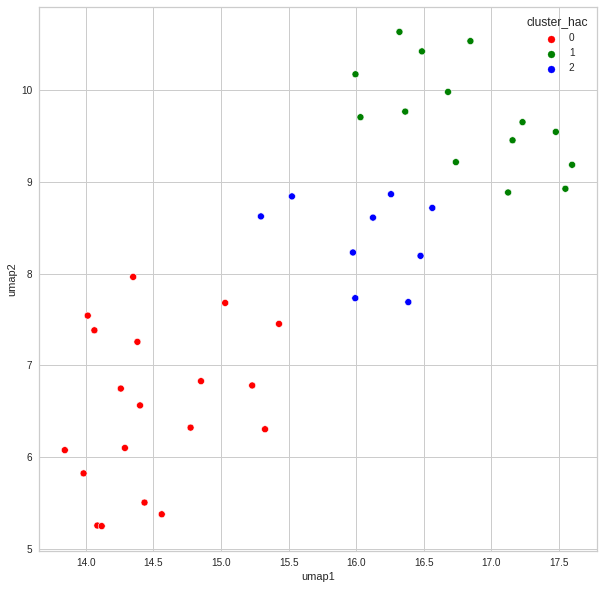

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="umap1", y="umap2", hue = "cluster_hac", data = df_umap_hac, palette =['red','green','blue'])
plt.show()

**Apply DBSCAN Algorithm**

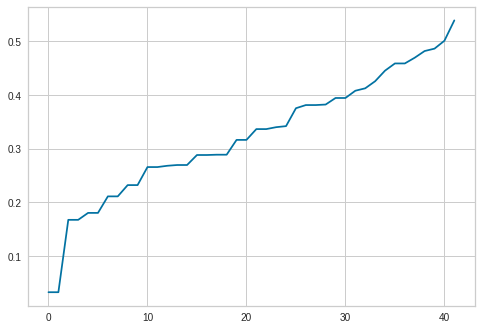

In [ ]:
#DBSCAN, let's find appropriate epsilon:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)  #,metric='cosine'
nbrs = neigh.fit(df_umap_cpy)
distances, indices = nbrs.kneighbors(df_umap_cpy)
#print(distances)
distances = np.sort(distances, axis=0)
#print('.........................')
#print(distances)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
#print(distances)

Text(0.5, 1.0, 'DBSCAN on UMAP')

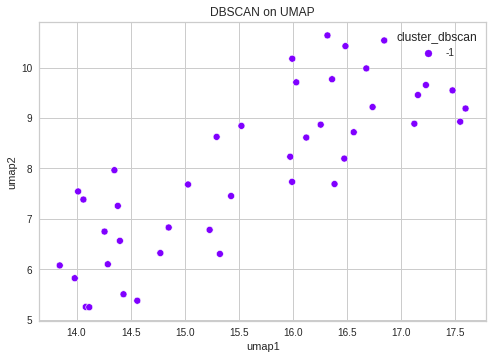

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5).fit(df_umap_cpy)
y_dbscan=db.labels_
df_umap_dbscan = pd.concat([df_umap_cpy,pd.DataFrame({'cluster_dbscan':y_dbscan})], axis = 1)
a = sns.scatterplot(x='umap1', y='umap2', hue = 'cluster_dbscan', data = df_umap_dbscan, palette = 'rainbow')
a.set_title('DBSCAN on UMAP')

In [ ]:
#not getting clustering while using DBSCAN algorithm when eps =0.49

**Apply Gaussian misture clustering**

In [ ]:
#Gaussian misture, let's choose the proper number of clusters:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(df_umap_cpy)
    df_umap_cpy['Cluster'] = gmm.predict(df_umap_cpy)
    d = metrics.silhouette_score(df_umap_cpy, df_umap_cpy['Cluster'], metric='euclidean')
    print(i, d)

2 0.6196716577589065
3 0.5423876877301905
4 0.466026552313261
5 0.6197235326869663
6 0.631319690314174
7 0.6798519786812325
8 0.6942948318126323
9 0.6768229638789183
10 0.672938117215512


In [ ]:
#df_umap_cpy.head()

Text(0.5, 1.0, 'Gaussian mixture on UMAP')

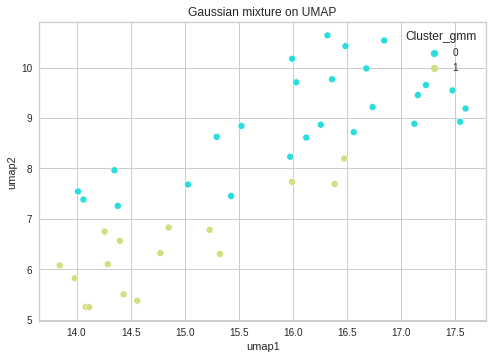

In [ ]:
#df_umap_cpy.drop(['Cluster'], axis = 1,inplace=True)
gmm = GaussianMixture(n_components=2)
gmm.fit(df_umap_cpy)
df_umap_cpy['Cluster_gmm'] = gmm.predict(df_umap_cpy)
ax = sns.scatterplot(x='umap1', y='umap2', hue = 'Cluster_gmm', data = df_umap_cpy, palette = 'rainbow')
ax.set_title('Gaussian mixture on UMAP')

In [ ]:
#Correlation check
df_cluster.drop(['cluster_hac'], axis = 1, inplace = True)
df_cluster = pd.concat([df_cluster, pd.DataFrame(df_umap_cpy['Cluster_gmm'])], axis = 1)

corr_table = df_cluster.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['Cluster_gmm']

ageGroup                                     NaN
gender                                       NaN
bmi                                          NaN
smoker                                       NaN
employed                                     NaN
sports                                       NaN
timeOfDay                                    NaN
testSuit                                     NaN
firstTask                                    NaN
dist_6mwt                                    NaN
dist_sct                                     NaN
swe_b_t1                                     NaN
swe_b_t4                                     NaN
swe_m_t1                                     NaN
swe_m_t4                                     NaN
swe_f_t1                                     NaN
swe_f_t4                                     NaN
swe_a_t1                                     NaN
swe_a_t4                                     NaN
hee_t1                                       NaN
hee_t4              

In [ ]:
cluster_assigned= pd.concat([df_ID,pd.DataFrame({'cluster_UMAP_KMeans':labels}),
                             pd.DataFrame({'cluster_UMAP_HAC':y_hc}),
                             pd.DataFrame({'cluster_UMAP_DBSCAN':y_dbscan}), 
                             pd.DataFrame({'cluster_UMAP_GMM':df_umap_cpy['Cluster_gmm']})], axis = 1)

In [ ]:
cluster_assigned

,pseudonym,cluster_UMAP_KMeans,cluster_UMAP_HAC,cluster_UMAP_DBSCAN,cluster_UMAP_GMM
0,0577770a,0,2,-1,0
1,10e5b7cd,0,2,-1,0
2,14103f09,1,0,-1,1
3,1d5d73b7,0,1,-1,0
4,2319ac8d,1,0,-1,0
5,2a8310f7,0,2,-1,0
6,2ac72c3c,1,0,-1,0
7,2b9ffa95,0,1,-1,0
8,32548257,0,1,-1,0
9,458409e7,0,1,-1,0


In [ ]:
cluster_assigned.to_csv('cluster_assigned_umap.csv')
files.download('cluster_assigned_umap.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>